In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [8]:
hla1=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
hla3=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
hla2=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/pbsim_ONT_95_20k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')

igk1=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
igk3=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/pbsim_ONT_98_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
igk2=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/pbsim_ONT_95_20k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')

tair1=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/TAIR/chr3/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
tair3=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/TAIR/chr3/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
tair2=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/TAIR/chr3/pbsim_ONT_95_20k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')

yeast1=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/yeast/chr10/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
yeast3=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/yeast/chr10/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
yeast2=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/yeast/chr10/pbsim_ONT_95_20k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')

In [9]:
all_df_name = ['hla1','hla2','hla3','igk1','igk2','igk3','tair1','tair2','tair3','yeast1','yeast2','yeast3']
regions = ['hla','hla','hla','igk','igk','igk','tair','tair','tair','yeast','yeast','yeast']
sequence_type = ['93_30k','95_20k','98_10k','93_30k','95_20k','98_10k','93_30k','95_20k','98_10k','93_30k','95_20k','98_10k']

all_df = [hla1,hla2,hla3,igk1,igk2,igk3,tair1,tair2,tair3,yeast1,yeast2,yeast3]

In [10]:
new_headers = ['method', 'precision', 'recall', 'continuity']
new_df = []
for i,df in enumerate(all_df):
    df = df.iloc[:,[1,3,6,11]]
    df.columns=new_headers
    df['category']=all_df_name[i]
    df['regions']=regions[i]
    df['sequence_type']=sequence_type[i]
    new_df.append(df)

/tmp/ipykernel_1396043/3703524851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category']=all_df_name[i]
/tmp/ipykernel_1396043/3703524851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regions']=regions[i]
/tmp/ipykernel_1396043/3703524851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [11]:
new_all_df = pd.concat(new_df)
all_df3 = new_all_df.copy()

In [ ]:
new_all_df[['de_method', 'distance','dimension_reduction']] = new_all_df['method'].str.split('_', n=2, expand=True)
new_all_df[['method', 'preprocess']] = new_all_df['method'].str.rsplit('_', n=1, expand=True)

In [15]:
from collections import Counter
Counter(new_all_df.preprocess.tolist())

Counter({'None': 134, 'IDF': 116, 'TF-IDF': 116, 'TF': 115})

In [17]:
Counter(new_all_df.dimension_reduction.tolist())

Counter({'None_None': 60,
         'None_IDF': 43,
         'None_TF': 41,
         'None_TF-IDF': 41,
         'Spectural_500d_TF': 22,
         'Spectural_500d_IDF': 20,
         'Spectural_500d_None': 20,
         'Spectural_500d_TF-IDF': 20,
         'scBiMap_500d_TF-IDF': 16,
         'scBiMap_500d_None': 16,
         'scBiMap_500d_IDF': 16,
         'scBiMap_500d_TF': 16,
         'GaussianRP_500d_TF-IDF': 11,
         'SparseRP_500d_IDF': 10,
         'SparseRP_500d_TF': 10,
         'SparseRP_500d_None': 10,
         'SparseRP_500d_TF-IDF': 10,
         'GaussianRP_500d_IDF': 9,
         'GaussianRP_500d_None': 9,
         'SimHash_3200d_None': 8,
         'SimHash_3200d_TF': 8,
         'SimHash_3200d_IDF': 8,
         'GaussianRP_500d_TF': 8,
         'SimHash_3200d_TF-IDF': 8,
         'GaussianRP_3200d_None': 4,
         'SparseRP_3200d_None': 4,
         'GaussianRP_3200d_TF-IDF': 4,
         'SparseRP_3200d_TF': 4,
         'SparseRP_3200d_TF-IDF': 4,
         'GaussianRP

In [13]:
new_all_df = new_all_df.dropna()

In [20]:
#weighted = ['MinHash','MinHash+IDF','MinHash+TF','MinHash+TF-IDF']
weighted_method = ['Exact_Euclidean_None_IDF','Exact_Cosine_None_IDF','Exact_Euclidean_None_None','Exact_Cosine_None_None','WeightedMinHash_Jaccard_None_IDF','Minimap2']

In [21]:
part2 = all_df3[all_df3.iloc[:,0].isin(weighted_method)].sort_values(by=['category','method'])

[0.6437404474086424, 0.6424899263582048, 0.6437404474086424, 0.539321939697096, 0.5242462137001529, 0.2424621370015284, 0.6786102062975027, 0.675747705063666, 0.6786102062975027, 0.5846412002763794, 0.5723028328891521, 0.2303819958543085, 0.6073892830927331, 0.6044776119402985, 0.6073892830927331, 0.522290188402251, 0.40915096647908, 0.2587961830193296] [0.9995086598697948, 0.999507934555296, 0.9995086598697948, 0.6848225535489291, 0.9690694626474444, 0.9938868353710548, 0.9981885658743485, 0.998365796563756, 0.9981885658743485, 0.8027699896705104, 0.9583679951599484, 0.9905114674243962, 0.9959396343323867, 0.99564137413882, 0.9959396343323867, 0.7356905583237511, 0.9213662062549202, 0.9849675940757536]
[0.5436853841475775, 0.5203729981755524, 0.5436853841475775, 0.4144536793026556, 0.2696128116764646, 0.2471112913034664, 0.5695816385822197, 0.5582510168506682, 0.5695816385822197, 0.4500290528762347, 0.295177222545032, 0.2534137129575828, 0.4985748895539404, 0.4916631038905515, 0.49857

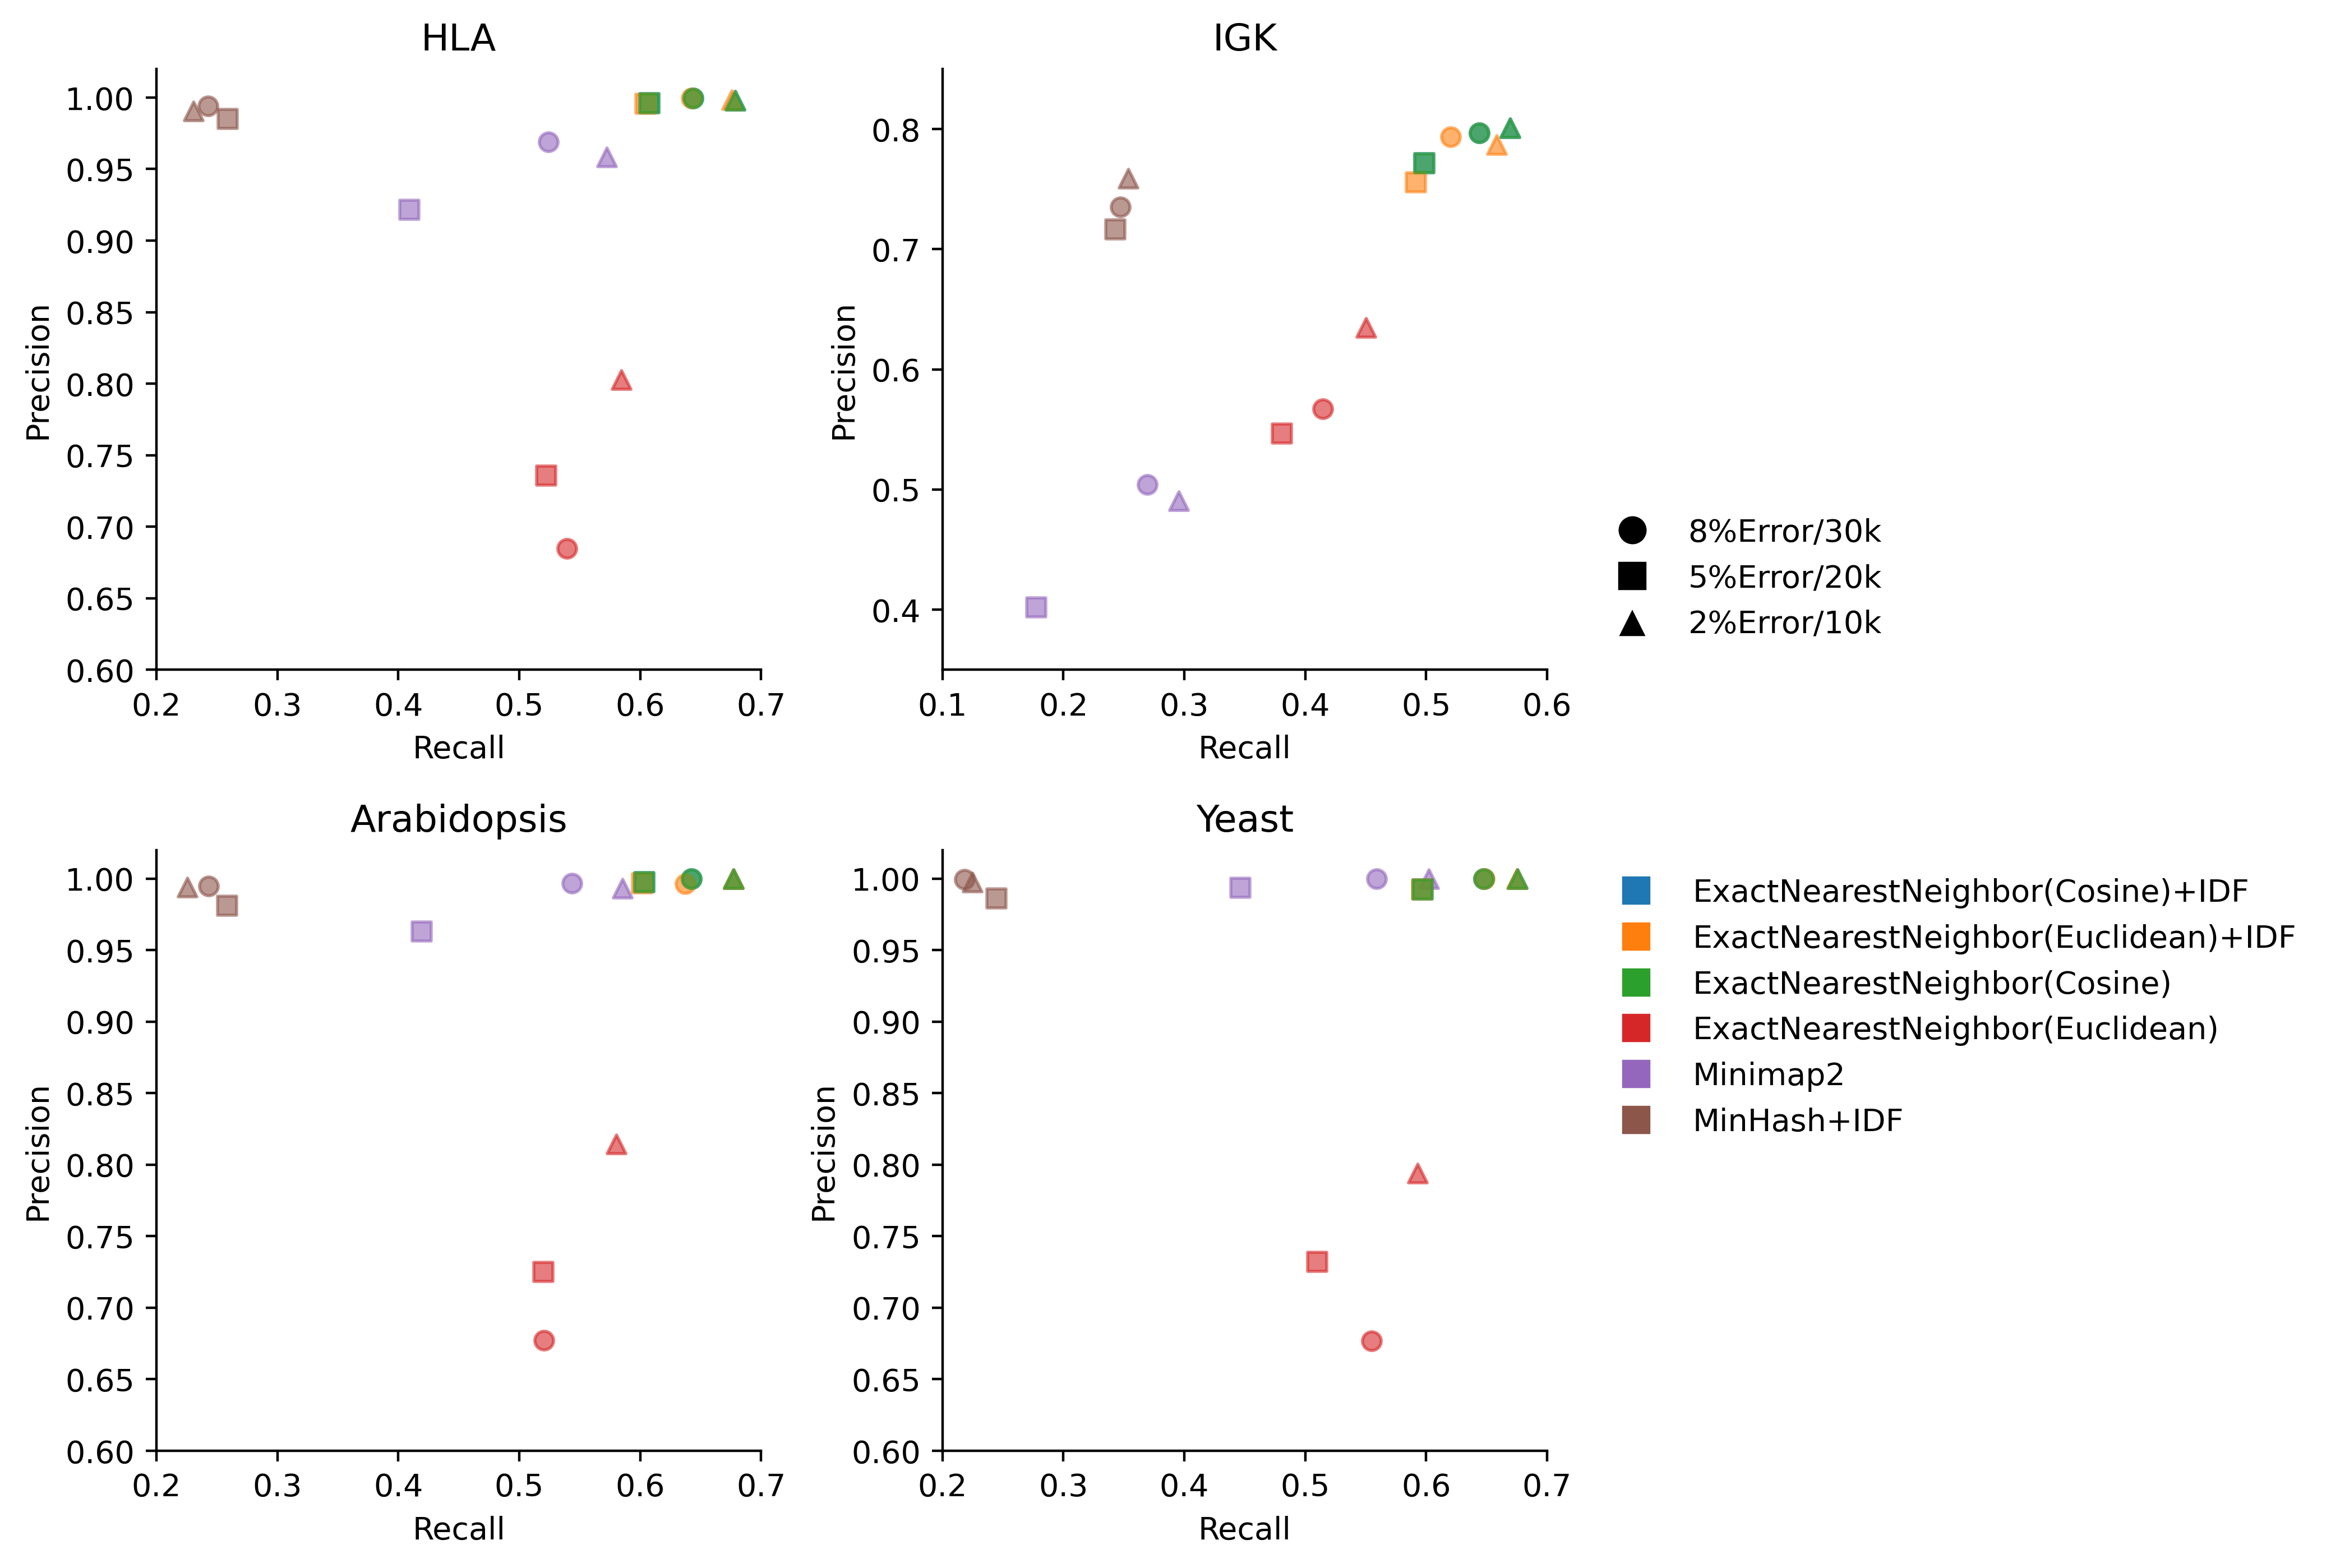

In [27]:
colors = sns.color_palette(palette='tab10')
plt.rcParams['figure.dpi'] = 400
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,8))
fig.subplots_adjust(wspace=0.3)
regions_origin = ['hla','igk','tair','yeast']
regions = ['HLA','IGK','Arabidopsis','Yeast']
for num,ax in enumerate([ax1,ax2,ax3,ax4]):
    y = part2[part2['category'].str.contains(regions_origin[num], case=False)].iloc[:,1].tolist()
    x = part2[part2['category'].str.contains(regions_origin[num], case=False)].iloc[:,2].tolist()
    category_color = colors[:6]+colors[:6]+colors[:6]
    category_shape = ['o']*6+['^']*6+['s']*6
    print(x,y)
    for i in range(0,18):
        ax.scatter(x[i], y[i], color=category_color[i],marker=category_shape[i],alpha=0.6)
    ax.set_title(regions[num])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

plt.subplots_adjust(hspace=0.3)

ax1.set_ylim(0.6,1.02)
ax1.set_xlim(0.2,0.7)

ax2.set_ylim(0.35,0.85)
ax2.set_xlim(0.1,0.6)

ax3.set_ylim(0.6,1.02)
ax3.set_xlim(0.2,0.7)

ax4.set_ylim(0.6,1.02)
ax4.set_xlim(0.2,0.7)

shape_list = ['o','s','^']


symbol_handles = [plt.Line2D([0], [0], marker=shape_list[i], color='w', markerfacecolor='black', markersize=10) 
                  for i in range(0,3)]
symbol_labels = ['8%Error/30k','5%Error/20k','2%Error/10k']
shape_legend = ax.legend(handles=symbol_handles, labels=symbol_labels, loc='upper right',frameon=False,bbox_to_anchor=(1.6,1.6))
ax.add_artist(shape_legend)
color_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[i], markersize=10)
                 for i in range(0,6)]
color_labels = ['ExactNearestNeighbor(Cosine)+IDF','ExactNearestNeighbor(Euclidean)+IDF','ExactNearestNeighbor(Cosine)','ExactNearestNeighbor(Euclidean)','Minimap2','MinHash+IDF'] 
ax.legend(handles=color_handles, labels=color_labels, loc='upper left',frameon=False,bbox_to_anchor=(1.05, 1))
# 将颜色图例添加到图中


plt.show()
#plt.savefig('/home/miaocj/docker_dir/kNN-overlap-finder/notebooks/article_draw/Exact_minhash_minimap2_scatter.pdf', dpi=300, bbox_inches='tight')

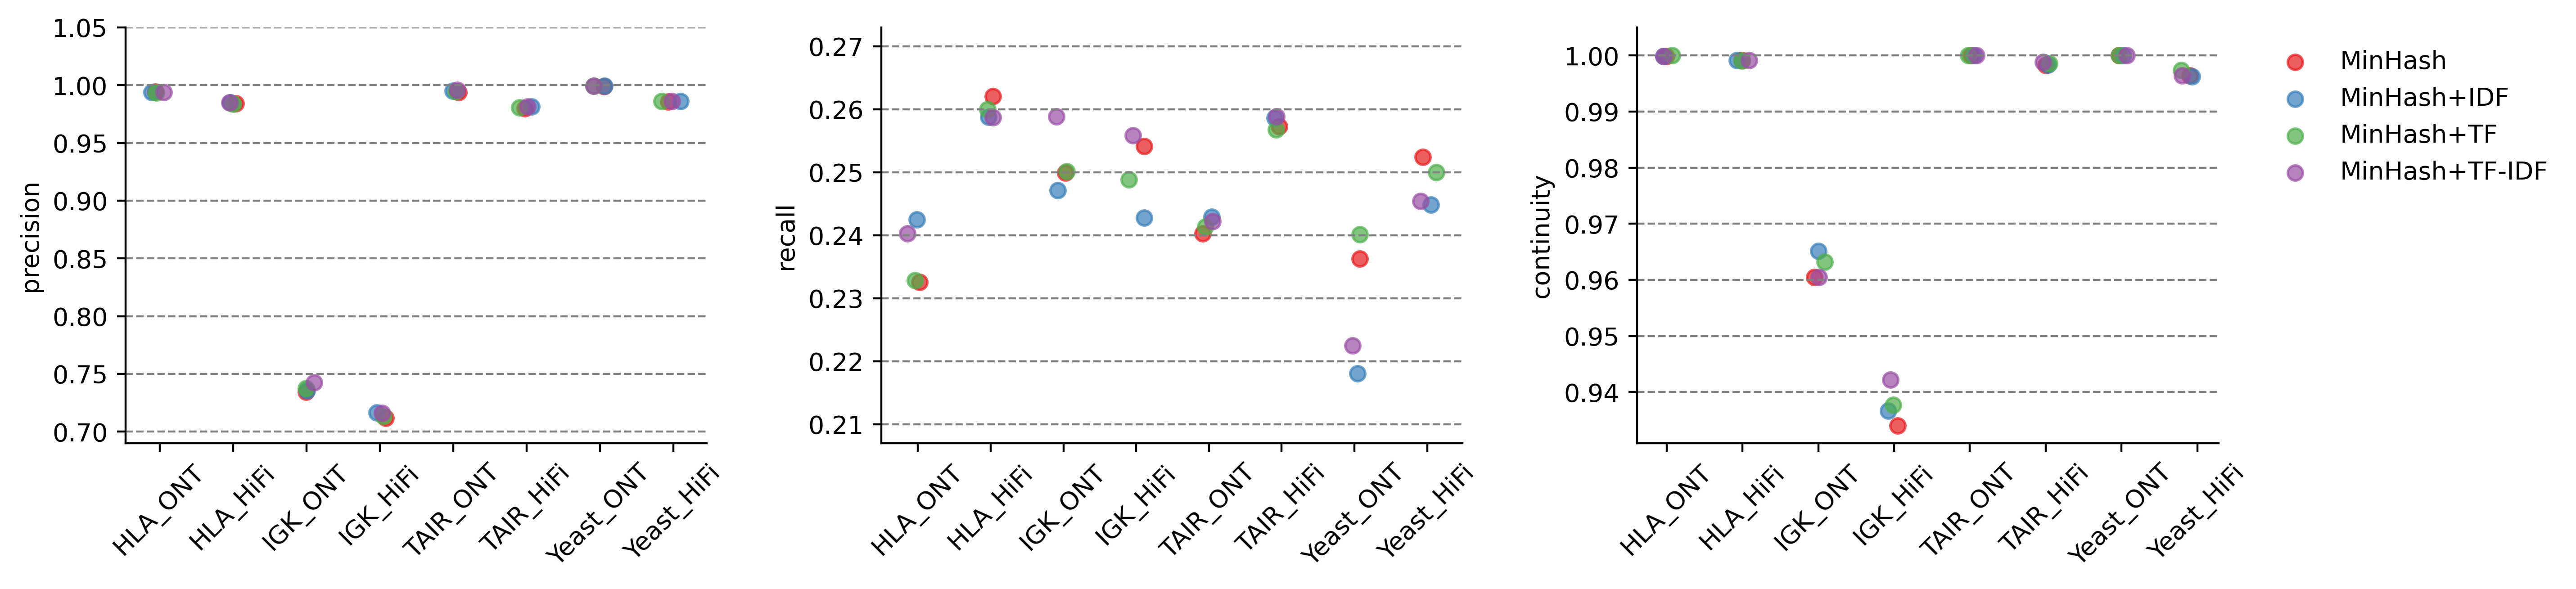

In [ ]:
samples=['HLA_ONT','HLA_HiFi','IGK_ONT','IGK_HiFi','TAIR_ONT','TAIR_HiFi','Yeast_ONT','Yeast_HiFi']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(2,3,figsize=(15,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, method in enumerate(weighted):
        method_values = values[num][i*8:(i+1)*8]
        x = rand_jitter([1,2,3,4,5,6,7,8])
        ax.scatter(x, method_values, color=colors[i], label=method,alpha=0.7)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks(ticks = [1,2,3,4,5,6,7,8],labels = samples)
    ax.set_xticklabels(samples, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])

ax1.set_ylim(0.69,1.05)
ax3.set_ylim(0.9309,1.005)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

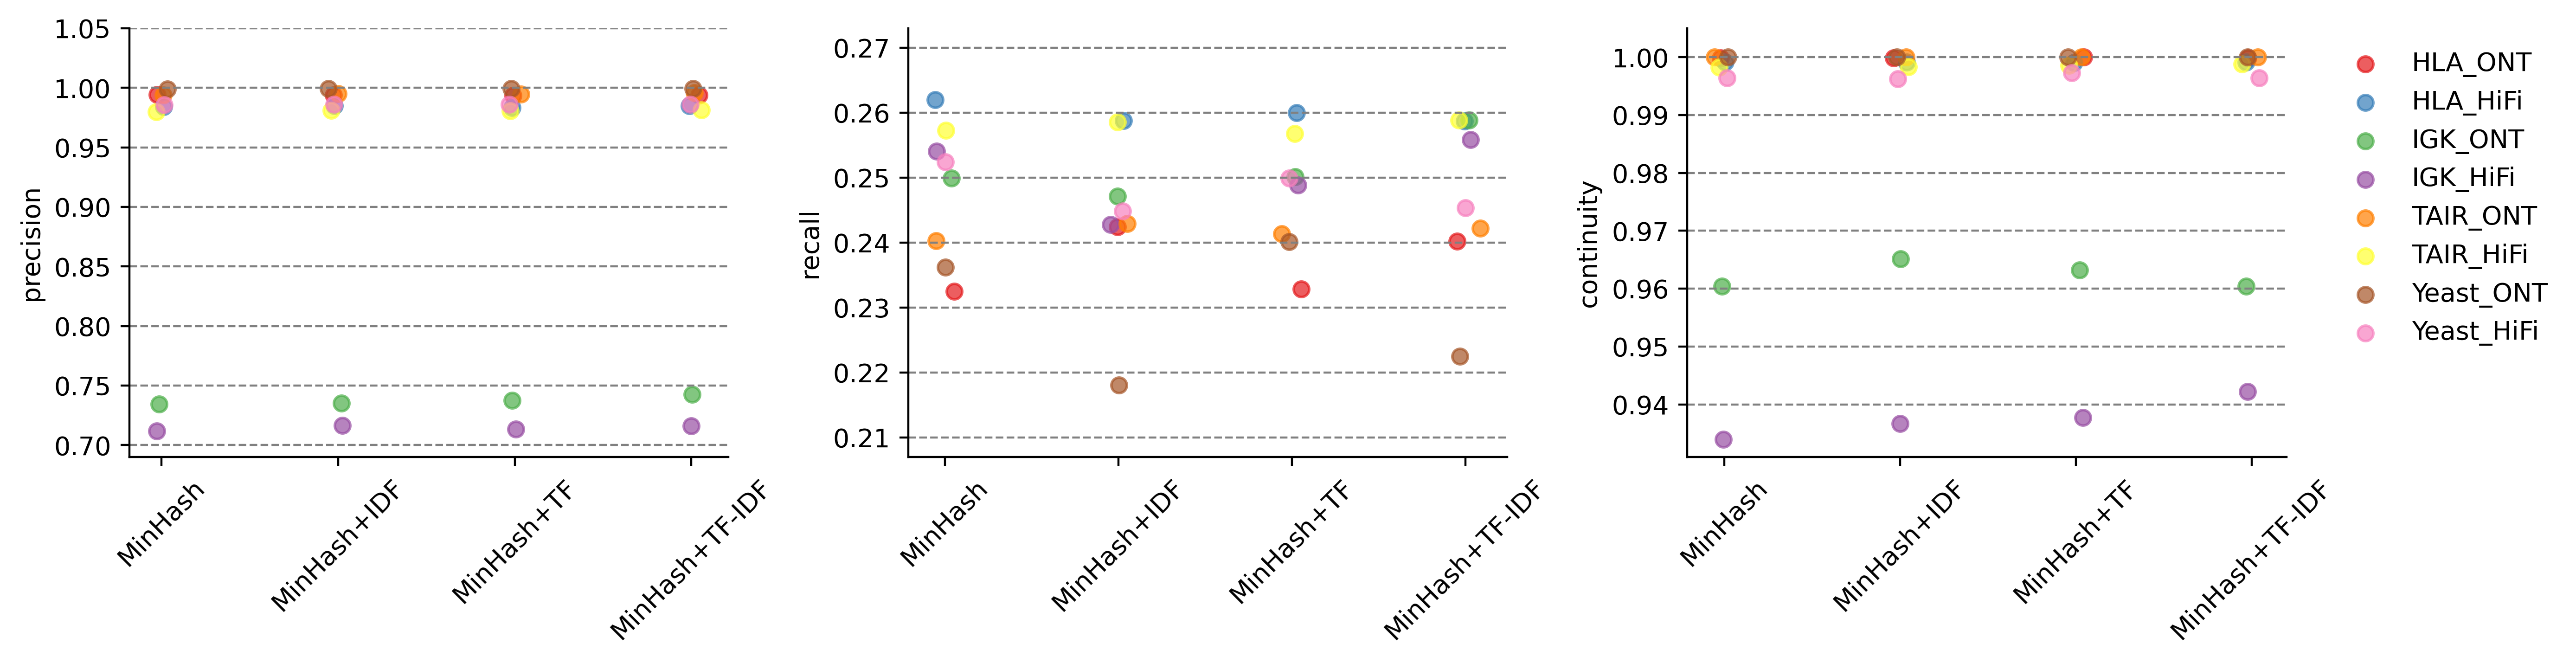

In [148]:
samples=['HLA_ONT','HLA_HiFi','IGK_ONT','IGK_HiFi','TAIR_ONT','TAIR_HiFi','Yeast_ONT','Yeast_HiFi']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, method in enumerate(samples):
        ind = [i,i+8,i+16,i+24]
        method_values =  [values[num][x] for x in ind]
        x = rand_jitter([1,2,3,4])
        ax.scatter(x, method_values, color=colors[i], label=samples[i],alpha=0.7)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks(ticks = [1,2,3,4],labels = weighted)
    ax.set_xticklabels(weighted, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])

ax1.set_ylim(0.69,1.05)
ax3.set_ylim(0.9309,1.005)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

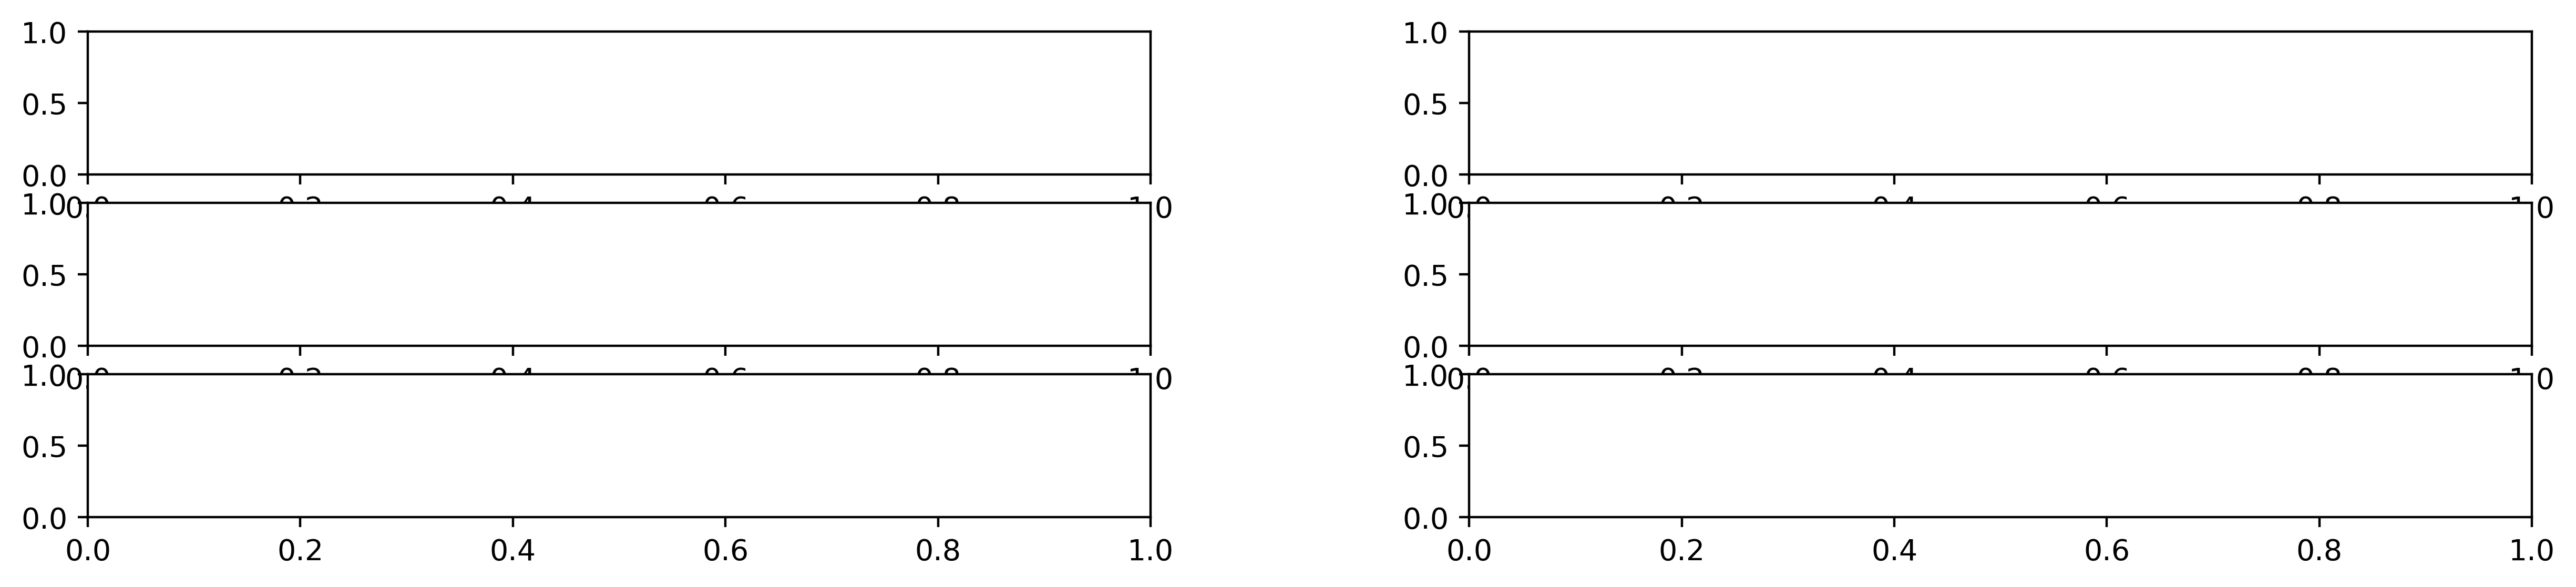

In [149]:
samples=['HLA_ONT','HLA_HiFi','IGK_ONT','IGK_HiFi','TAIR_ONT','TAIR_HiFi','Yeast_ONT','Yeast_HiFi']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3) = plt.subplots(3,2,figsize=(15,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, method in enumerate(samples):
        ind = [i,i+8,i+16,i+24]
        method_values =  [values[num][x] for x in ind]
        x = rand_jitter([1,2,3,4])
        ax.scatter(x, method_values, color=colors[i], label=samples[i],alpha=0.7)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks(ticks = [1,2,3,4],labels = weighted)
    ax.set_xticklabels(weighted, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])

ax1.set_ylim(0.69,1.05)
ax3.set_ylim(0.9309,1.005)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

In [55]:
i=0
range(i*8,(i+1)*8)

range(0, 8)

In [ ]:
samples=['TAIR_6','TAIR_12','yeast_6','yeast_12']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, sample in enumerate(samples):
        method_values = values[num][i*4:i*4+4]
        ax.scatter(weighted, method_values, color=colors[i],label=sample,alpha=0.5)
    ax.set_xticks(weighted, weighted, rotation=70)
    # ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])
ax3.set_ylim(0,1.05)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)